In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(city_df, ride_df, how='outer', on='city')

# Display the data table for preview
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

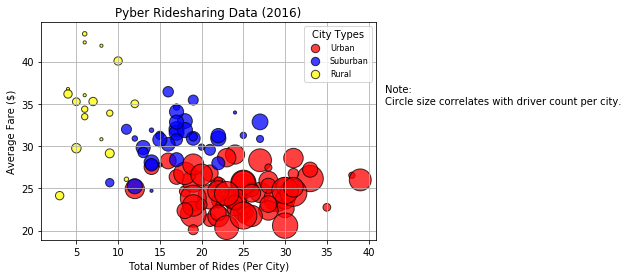

In [19]:
# Obtain the x and y coordinates for each of the three city types
urban = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
suburban = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])
rural = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])

x_urban = urban["ride_id"].count()
y_urban = urban["fare"].mean()
s_urban = urban["driver_count"].mean()

x_suburban = suburban["ride_id"].count()
y_suburban = suburban["fare"].mean()
s_suburban = suburban["driver_count"].mean()

x_rural = rural["ride_id"].count()
y_rural = rural["fare"].mean()
s_rural = rural["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["red"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["blue"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["yellow"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ridesharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best")
legend.legendHandles[0]._sizes = [70]
legend.legendHandles[1]._sizes = [70]
legend.legendHandles[2]._sizes = [70]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyber_Scatter.png")


In [13]:
# Show plot
plt.show()

## Total Fares by City Type

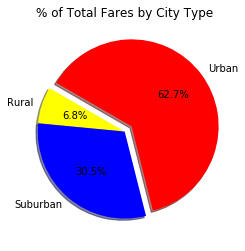

In [17]:
# Calculate Type Percents
type_df = pyber_df.groupby(["type"])
fare_sum = type_df["fare"].sum()

# Build Pie Chart
pie_labels = ["Rural","Suburban","Urban"]
pie_explode = (0, 0, 0.1)
pie_colors = ["yellow", "blue", "red"]
plt.pie(fare_sum, explode=pie_explode, labels=pie_labels, colors=pie_colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Pyber_Fare_Pie.png")


In [10]:
# Show Figure
plt.show()

## Total Rides by City Type

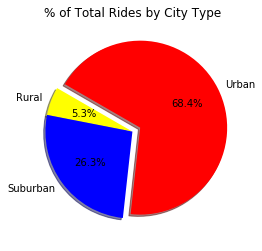

In [18]:
# Calculate Ride Percents
ride_ct = type_df["ride_id"].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["yellow", "blue", "red"]
plt.pie(ride_ct, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Pyber_Ride_Pie.png")


In [20]:
# Show Figure
plt.show()

## Total Drivers by City Type

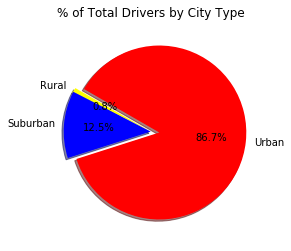

In [23]:
# Calculate Driver Percents
driver_type_df = pyber_df.groupby(["type"])
driver_sum = driver_type_df["driver_count"].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["yellow", "blue", "red"]
plt.pie(driver_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Pyber_Driver_Pie.png")

In [24]:
# Show Figure
plt.show()